In [ ]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, AdaBoostRegressor,BaggingRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler, StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/CarDF.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76690 entries, 0 to 76689
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           76690 non-null  int64  
 1   Make                 76690 non-null  object 
 2   Name                 76690 non-null  object 
 3   Transmission         76690 non-null  object 
 4   Engine Type          76690 non-null  object 
 5   Engine Capacity(CC)  76687 non-null  float64
 6   Mileage(kms)         76690 non-null  int64  
 7   City                 76690 non-null  object 
 8   Year                 76690 non-null  int64  
 9   Price                76690 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 5.9+ MB


In [ ]:
df.drop_duplicates()

,Unnamed: 0,Make,Name,Transmission,Engine Type,Engine Capacity(CC),Mileage(kms),City,Year,Price
0,0,Honda,BR-V i-VTEC S,Automatic,Petrol,1500.0,41371,Karachi,2017,3150000.0
1,1,Toyota,Corolla Altis Automatic 1.6,Automatic,Petrol,1600.0,2460,Karachi,2021,3575000.0
2,2,Toyota,Vitz F Limited II 1.0,Automatic,Petrol,1000.0,67000,Karachi,2014,1955000.0
3,3,Daihatsu,Move Custom X Limited,Automatic,Petrol,660.0,64000,Lahore,2013,1450000.0
4,4,Toyota,Prado TX L Package 2.7,Automatic,Petrol,2700.0,64000,Lahore,2016,19000000.0
...,...,...,...,...,...,...,...,...,...,...
76685,76685,Suzuki,Bolan VX Euro II,Manual,Petrol,800.0,59500,Lahore,2016,890000.0
76686,76686,Toyota,Prius G LED Edition 1.8,Automatic,Petrol,1800.0,199000,Rawalpindi,2010,2700000.0
76687,76687,KIA,Sportage AWD,Automatic,Petrol,2000.0,180,Lahore,2020,5900000.0
76688,76688,Suzuki,Bolan,Manual,Petrol,800.0,16300,Rawalpindi,2019,1170000.0


In [ ]:
df.head()

,Unnamed: 0,Make,Name,Transmission,Engine Type,Engine Capacity(CC),Mileage(kms),City,Year,Price
0,0,Honda,BR-V i-VTEC S,Automatic,Petrol,1500.0,41371,Karachi,2017,3150000.0
1,1,Toyota,Corolla Altis Automatic 1.6,Automatic,Petrol,1600.0,2460,Karachi,2021,3575000.0
2,2,Toyota,Vitz F Limited II 1.0,Automatic,Petrol,1000.0,67000,Karachi,2014,1955000.0
3,3,Daihatsu,Move Custom X Limited,Automatic,Petrol,660.0,64000,Lahore,2013,1450000.0
4,4,Toyota,Prado TX L Package 2.7,Automatic,Petrol,2700.0,64000,Lahore,2016,19000000.0


In [ ]:
df.describe(include='all')

,Unnamed: 0,Make,Name,Transmission,Engine Type,Engine Capacity(CC),Mileage(kms),City,Year,Price
count,76690.000000,76690,76690,76690,76690,76687.000000,76690.000000,76690,76690.000000,7.669000e+04
unique,NaN,66,2845,2,5,NaN,NaN,326,NaN,NaN
top,NaN,Toyota,Corolla GLi 1.3 VVTi,Automatic,Petrol,NaN,NaN,Lahore,NaN,NaN
freq,NaN,29585,2954,44110,68890,NaN,NaN,15729,NaN,NaN
mean,38344.500000,NaN,NaN,NaN,NaN,1499.699806,87959.350411,NaN,2011.999374,3.023282e+06
std,22138.640409,NaN,NaN,NaN,NaN,723.373657,78759.138384,NaN,7.371098,4.303293e+06
min,0.000000,NaN,NaN,NaN,NaN,16.000000,1.000000,NaN,1940.000000,5.000000e+05
25%,19172.250000,NaN,NaN,NaN,NaN,1000.000000,39000.000000,NaN,2007.000000,1.215000e+06
50%,38344.500000,NaN,NaN,NaN,NaN,1300.000000,79892.000000,NaN,2014.000000,2.025000e+06
75%,57516.750000,NaN,NaN,NaN,NaN,1800.000000,119787.500000,NaN,2018.000000,3.200000e+06


In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)
df.dropna(inplace=True)

<ipython-input-178-e7f1b3a46bca>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=45, ha='right')
<ipython-input-178-e7f1b3a46bca>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=45, ha='right')
<ipython-input-178-e7f1b3a46bca>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=45, ha='right')
<ipython-input-178-e7f1b3a46bca>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=45, ha='right')


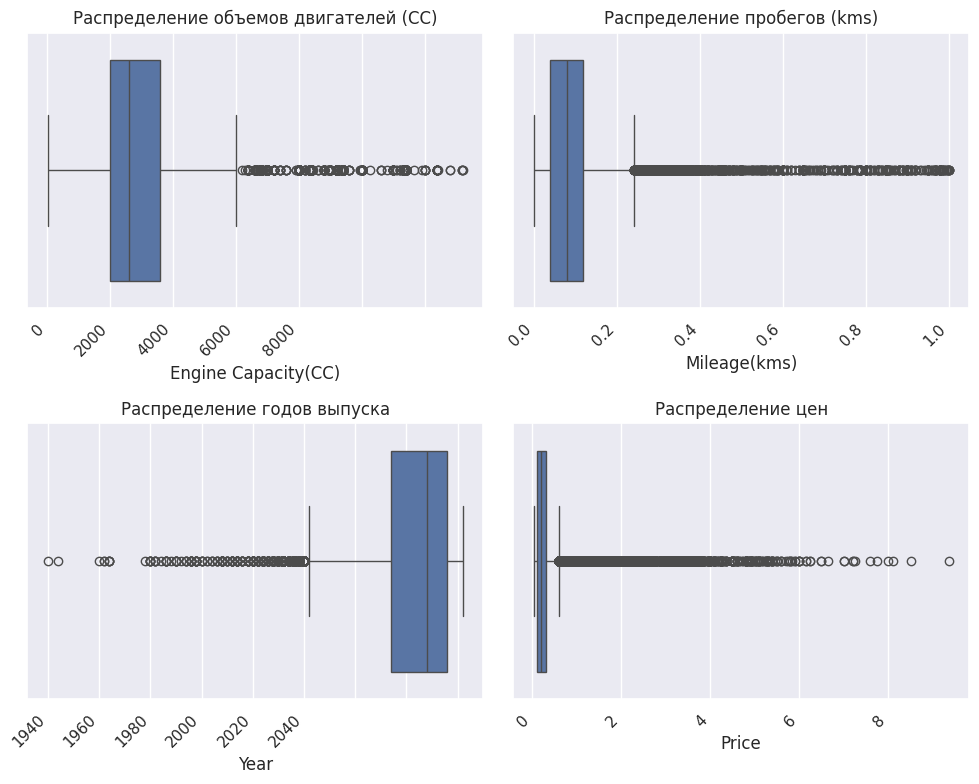

In [ ]:
# Создаем сетку из 4 subplot'ов
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharey=False)

# Располагаем boxplots по ячейкам
sns.boxplot(data=df, x="Engine Capacity(CC)", ax=axs[0, 0])
sns.boxplot(data=df, x="Mileage(kms)", ax=axs[0, 1])
sns.boxplot(data=df, x="Year", ax=axs[1, 0])
sns.boxplot(data=df, x="Price", ax=axs[1, 1])

# Устанавливаем заголовки
axs[0, 0].set_title("Распределение объемов двигателей (CC)")
axs[0, 1].set_title("Распределение пробегов (kms)")
axs[1, 0].set_title("Распределение годов выпуска")
axs[1, 1].set_title("Распределение цен")

# Настраиваем оси для каждой диаграммы
for i in range(2):
    for j in range(2):
        # Убираем дублирующиеся метки y-оси для всех кроме первого столбца
        if j != 0:
            axs[i, j].get_yaxis().set_visible(False)

        # Поворачиваем метки x-оси под углом 45 градусов
        axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

##Гистограмма

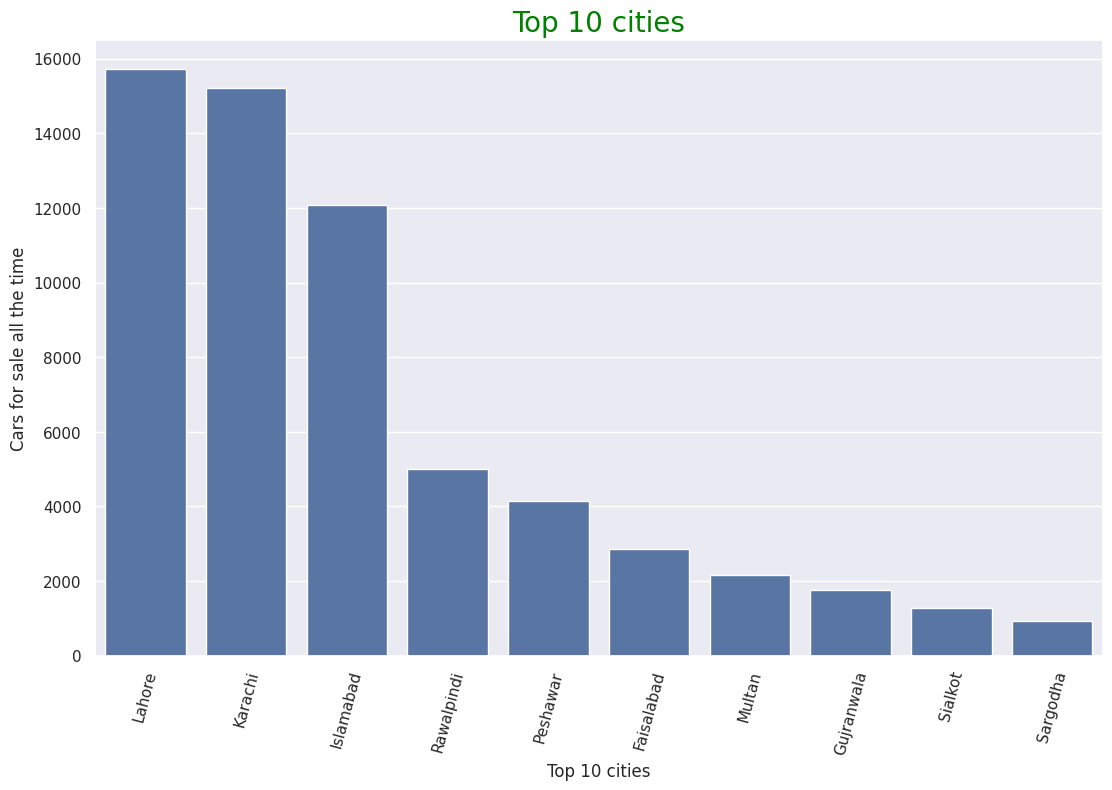

In [ ]:
cities = df.City.value_counts()
plt.figure(figsize=(13,8))
sns.barplot(x=cities[:10].index,y=cities[:10].values)
plt.xlabel('Top 10 cities')
plt.ylabel('Cars for sale all the time')
plt.title('Top 10 cities',color = 'green',fontsize=20)
plt.xticks(rotation=75)
plt.show()

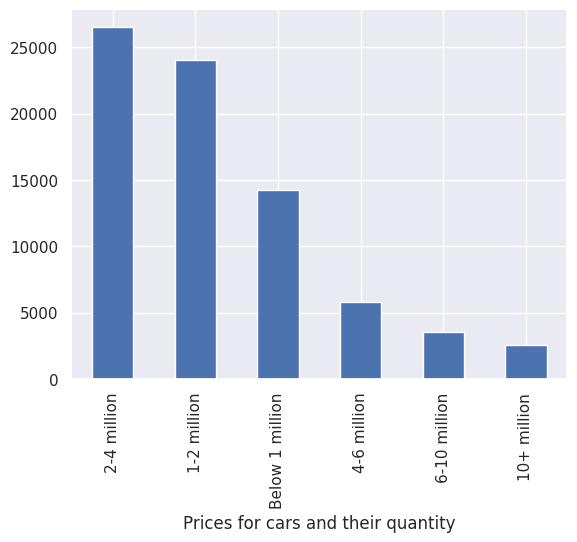

In [ ]:
bins = [0,1000001,2000001,4000001,6000001,10000001,100000001]
labels = ['Below 1 million','1-2 million','2-4 million','4-6 million','6-10 million','10+ million']
df['Prices for cars and their quantity'] = pd.cut(df['Price'],bins,labels = labels)
df['Prices for cars and their quantity'].value_counts().plot(kind='bar')
plt.show()

##Линейный график

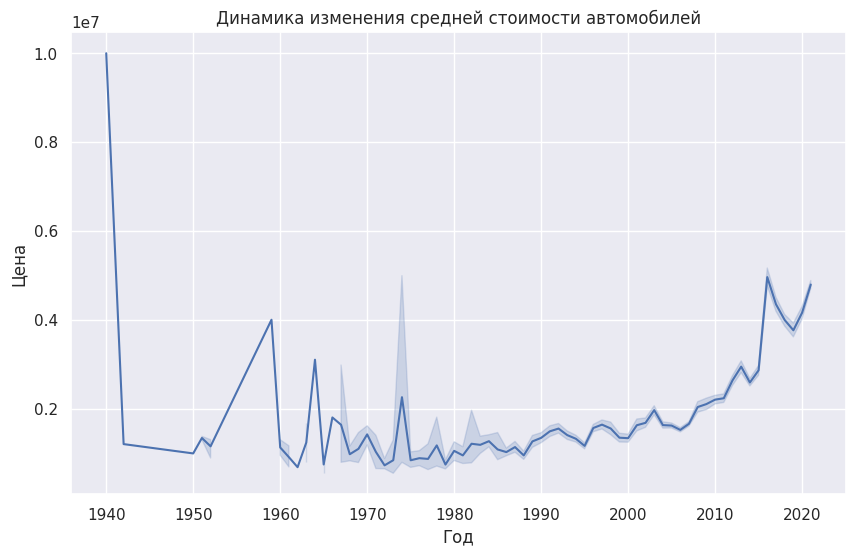

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Year', y='Price', data=df)
ax.set_title('Динамика изменения средней стоимости автомобилей')
ax.set_xlabel('Год')
ax.set_ylabel('Цена')
plt.show()

##Круговая диаграмма

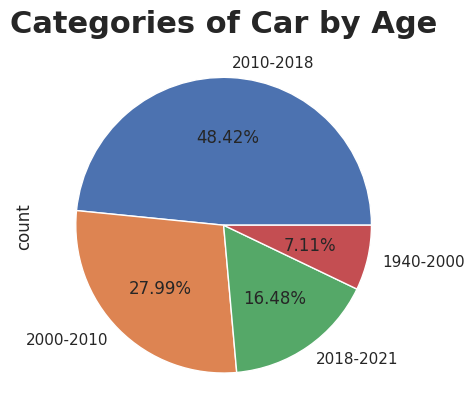

In [ ]:
bins = [1940,2000,2010,2018,2021]
labels = ['1940-2000','2000-2010','2010-2018','2018-2021']
df['Car Age'] = pd.cut(df['Year'],bins,labels = labels)
df['Car Age'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Categories of Car by Age', fontdict={'fontweight':'bold' ,'fontsize':22})
plt.show()

##Столбчатая диаграмма

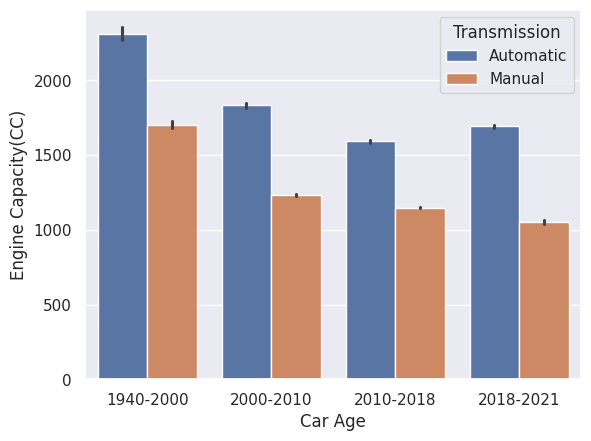

In [ ]:
sns.barplot(x=df['Car Age'],y=df['Engine Capacity(CC)'],hue=df['Transmission'])
plt.show()

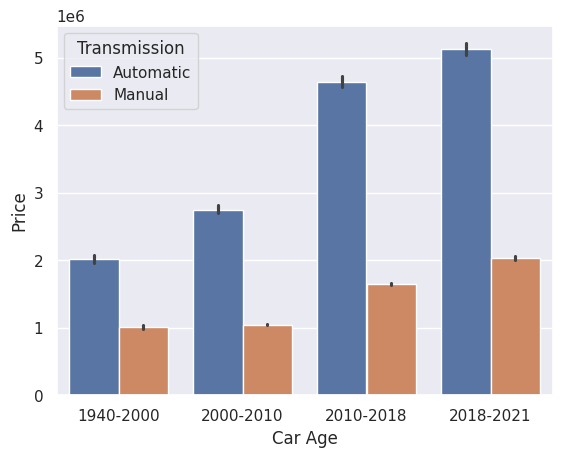

In [ ]:
sns.barplot(x=df['Car Age'],y=df['Price'],hue=df['Transmission'])
plt.show()

##Парный график

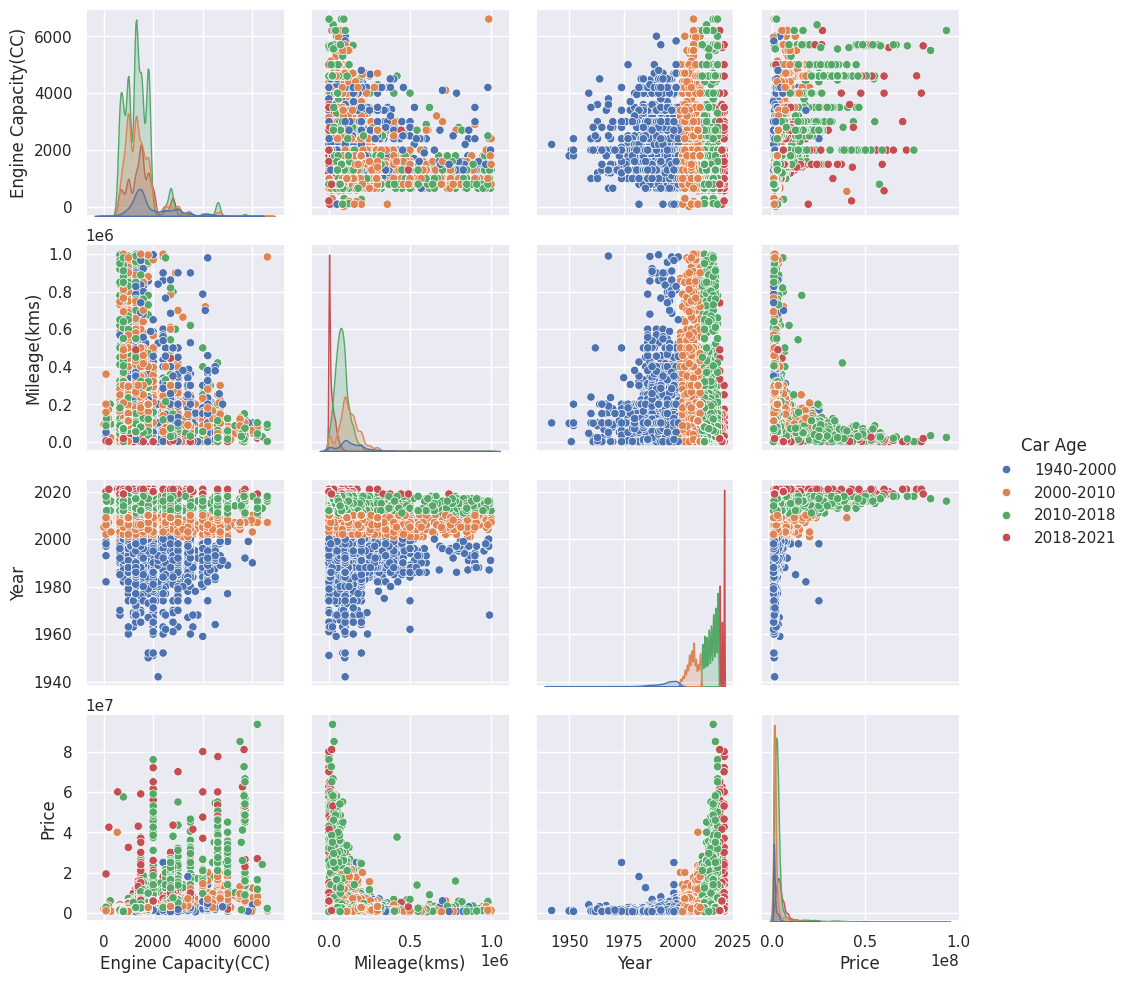

In [ ]:
sns.pairplot(df,hue='Car Age')
plt.show()

In [ ]:
df = df.rename({'Engine Type': 'Engine_Type','Car Age': 'Car_Age'}, axis=1)

In [ ]:
ordinal_map = {'CNG':1,
               'LPG':2,
               'Petrol':3,
               'Diesel':4,
               'Hybrid':5,


}

df['Engine Type_new'] = df.Engine_Type.map(ordinal_map)
df=df.drop(['Engine_Type'],axis=1)
df.head()

,Make,Name,Transmission,Engine Capacity(CC),Mileage(kms),City,Year,Price,Prices for cars and their quantity,Car_Age,Engine Type_new
0,Honda,BR-V i-VTEC S,Automatic,1500.0,41371,Karachi,2017,3150000.0,2-4 million,2010-2018,3
1,Toyota,Corolla Altis Automatic 1.6,Automatic,1600.0,2460,Karachi,2021,3575000.0,2-4 million,2018-2021,3
2,Toyota,Vitz F Limited II 1.0,Automatic,1000.0,67000,Karachi,2014,1955000.0,1-2 million,2010-2018,3
3,Daihatsu,Move Custom X Limited,Automatic,660.0,64000,Lahore,2013,1450000.0,1-2 million,2010-2018,3
4,Toyota,Prado TX L Package 2.7,Automatic,2700.0,64000,Lahore,2016,19000000.0,10+ million,2010-2018,3


In [ ]:
ordinal_map = {'Manual':1,
               'Automatic':2
}

df['Transmission_new'] = df.Transmission.map(ordinal_map)
df=df.drop(['Transmission'],axis=1)
df.head()

,Make,Name,Engine Capacity(CC),Mileage(kms),City,Year,Price,Prices for cars and their quantity,Car_Age,Engine Type_new,Transmission_new
0,Honda,BR-V i-VTEC S,1500.0,41371,Karachi,2017,3150000.0,2-4 million,2010-2018,3,2
1,Toyota,Corolla Altis Automatic 1.6,1600.0,2460,Karachi,2021,3575000.0,2-4 million,2018-2021,3,2
2,Toyota,Vitz F Limited II 1.0,1000.0,67000,Karachi,2014,1955000.0,1-2 million,2010-2018,3,2
3,Daihatsu,Move Custom X Limited,660.0,64000,Lahore,2013,1450000.0,1-2 million,2010-2018,3,2
4,Toyota,Prado TX L Package 2.7,2700.0,64000,Lahore,2016,19000000.0,10+ million,2010-2018,3,2


In [ ]:
df = df.rename({'Car Age': 'Car_Age'}, axis=1)
ordinal_map = {'1940-2000':1,
               '2000-2010':2,
               '2010-2018':3,
               '2018-2021':4,


}

df['Car_Age_new'] = df.Car_Age.map(ordinal_map)
df=df.drop(['Car_Age'],axis=1)
df.dropna(inplace=True)
df[["Car_Age_new"]] = df[["Car_Age_new"]].astype(int)

##Диаграмма корреляции

In [ ]:
df.head()

,Make,Name,Engine Capacity(CC),Mileage(kms),City,Year,Price,Prices for cars and their quantity,Engine Type_new,Transmission_new,Car_Age_new
0,Honda,BR-V i-VTEC S,1500.0,41371,Karachi,2017,3150000.0,2-4 million,3,2,3
1,Toyota,Corolla Altis Automatic 1.6,1600.0,2460,Karachi,2021,3575000.0,2-4 million,3,2,4
2,Toyota,Vitz F Limited II 1.0,1000.0,67000,Karachi,2014,1955000.0,1-2 million,3,2,3
3,Daihatsu,Move Custom X Limited,660.0,64000,Lahore,2013,1450000.0,1-2 million,3,2,3
4,Toyota,Prado TX L Package 2.7,2700.0,64000,Lahore,2016,19000000.0,10+ million,3,2,3


In [ ]:
categorical_columns = ['Make', 'Name','City','Prices for cars and their quantity']
for col in categorical_columns:
     le = LabelEncoder()
     df[col] = le.fit_transform(df[col])

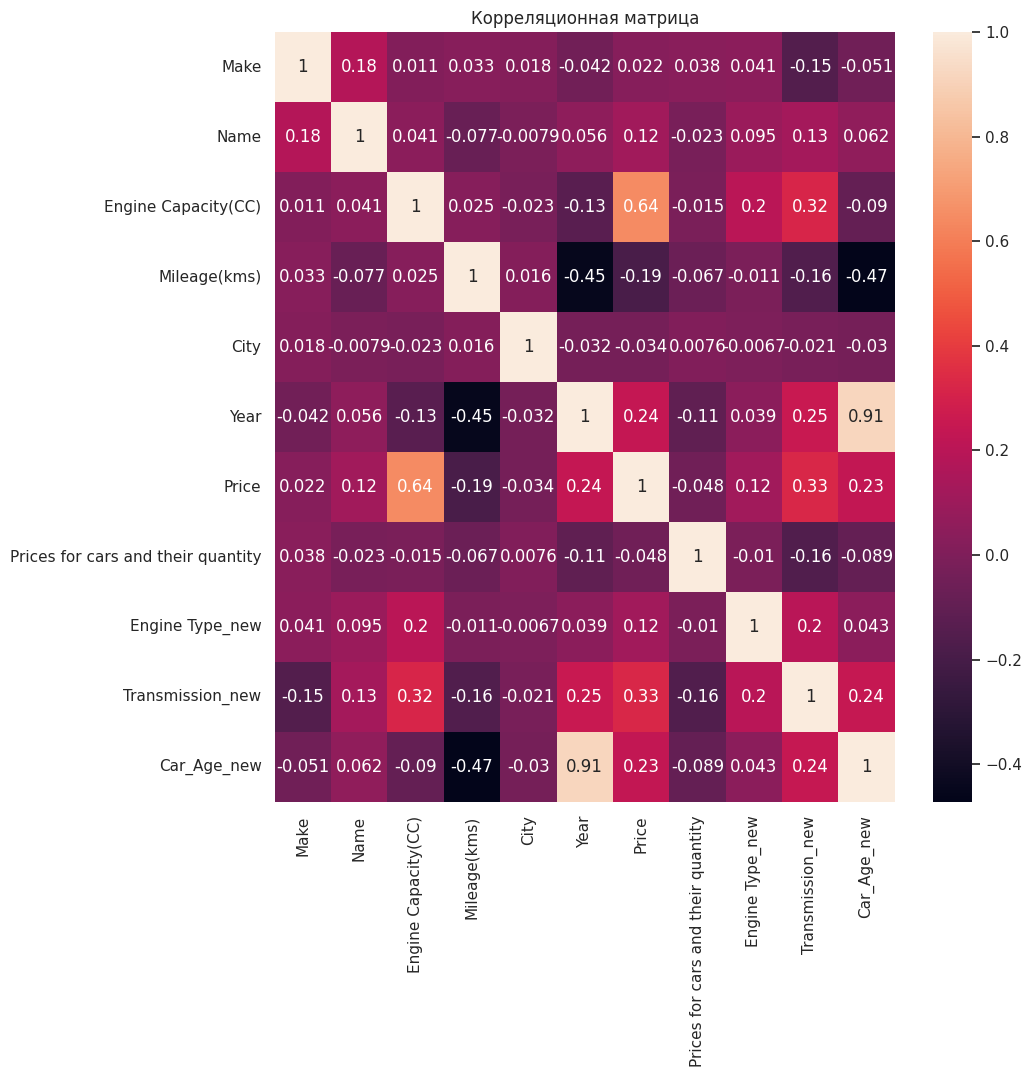

In [ ]:
selected_columns = ['Make',	'Name',	'Engine Capacity(CC)',	'Mileage(kms)',	'City',	'Year',	'Price',	'Prices for cars and their quantity',	'Engine Type_new',	'Transmission_new',	'Car_Age_new']
subset_df = df[selected_columns]
corr_matrix = subset_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
df.head()

,Make,Name,Engine Capacity(CC),Mileage(kms),City,Year,Price,Prices for cars and their quantity,Engine Type_new,Transmission_new,Car_Age_new
0,27,273,1500.0,41371,138,2017,3150000.0,2,3,2,3
1,59,882,1600.0,2460,138,2021,3575000.0,2,3,2,4
2,59,2675,1000.0,67000,138,2014,1955000.0,0,3,2,3
3,16,1819,660.0,64000,171,2013,1450000.0,0,3,2,3
4,59,2062,2700.0,64000,171,2016,19000000.0,1,3,2,3


##Разделение данных на признаки и целевую переменную

In [ ]:
# Выбираем числовые признаки для масштабирования
numerical_features = ['Engine Capacity(CC)', 'Mileage(kms)', 'Year', 'Engine Type_new', 'Transmission_new', 'Price']

scaler = RobustScaler()

# Масштабируем данные
scaled_data = scaler.fit_transform(df[numerical_features])

# Преобразуем обратно в DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)

# Объединяем со всеми остальными признаками
final_scaled_df = pd.concat([df.drop(numerical_features, axis=1), scaled_df], axis=1)

print(final_scaled_df.head())

   Make    Name   City  Prices for cars and their quantity  Car_Age_new  \
0  27.0   273.0  138.0                                 2.0          3.0   
1  59.0   882.0  138.0                                 2.0          4.0   
2  59.0  2675.0  138.0                                 0.0          3.0   
3  16.0  1819.0  171.0                                 0.0          3.0   
4  59.0  2062.0  171.0                                 1.0          3.0   

   Engine Capacity(CC)  Mileage(kms)      Year  Engine Type_new  \
0                0.250     -0.476844  0.272727              0.0   
1                0.375     -0.958416  0.636364              0.0   
2               -0.375     -0.159653  0.000000              0.0   
3               -0.800     -0.196782 -0.090909              0.0   
4                1.750     -0.196782  0.181818              0.0   

   Transmission_new     Price  
0               0.0  0.566751  
1               0.0  0.780856  
2               0.0 -0.035264  
3               0.

In [ ]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df[numerical_features])
y = df['Price']
X = scaled_data

## Разделение данных на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##RandomForestRegressor

In [ ]:
# Создание модели и настройка параметров
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    min_samples_split=2)

# Кросс-валидация
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')  # Используем 5-fold CV
cv_mae = -1 * np.mean(cv_scores)  # Переводим отрицательные значения в положительные для MAE

# Засекаем время перед обучением
start_time = time.time()

# Обучение модели на всем тренировочном наборе
rf_model.fit(X_train, y_train)

# Завершение отсчета времени после обучения
end_time = time.time()

# Время обучения
training_time = end_time - start_time

# Прогнозирование на тестовом наборе данных
y_pred = rf_model.predict(X_test)

# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred)

# Вывод результатов
print(f'MAE RF: {mae:.4f}')
print(f'Средний MAE по кросс-валидации: {cv_mae:.4f}')
print(f'Время обучения: {training_time:.4f} секунд')

MAE RF: 886.1429
Средний MAE по кросс-валидации: 1049.3800
Время обучения: 17.2636 секунд


##HistGradientBoostingRegressor

In [ ]:
# Создание модели и настройка параметров
hgb_model = HistGradientBoostingRegressor(
    max_iter=25,
    random_state=42,
    max_leaf_nodes=25,
    learning_rate=0.03,
    l2_regularization=0.001,
    early_stopping=True,
    validation_fraction=0.1,
    tol=1e-4
)

# Кросс-валидация
cv_scores = cross_val_score(hgb_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')  # Используем 5-fold CV
cv_mae = -1 * np.mean(cv_scores)  # Переводим отрицательные значения в положительные для MAE

# Засекаем время перед обучением
start_time = time.time()

# Обучение модели на всем тренировочном наборе
hgb_model.fit(X_train, y_train)

# Завершаем отсчет времени после обучения
end_time = time.time()

# Время обучения
training_time = end_time - start_time

# Прогнозирование на тестовом наборе данных
y_pred = hgb_model.predict(X_test)

# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred)

# Вывод результатов
print(f'MAE HGB: {mae:.4f}')
print(f'Средний MAE по кросс-валидации: {cv_mae:.4f}')
print(f'Время обучения: {training_time:.4f} секунд')

MAE HGB: 947976.5034
Средний MAE по кросс-валидации: 956029.2222
Время обучения: 0.6739 секунд


##AdaBoostRegressor

In [ ]:
# Создаем модель AdaBoostRegressor с дополнительными параметрами
ada_model = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=0.01,  # Скорость обучения уменьшена
    random_state=42     # Фиксируем случайность для воспроизводимости
)

# Проводим кросс-валидацию
cv_scores = cross_val_score(ada_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * np.mean(cv_scores)  # Переводим отрицательные значения в положительные для MAE

# Засекаем время начала обучения модели
start_time = time.time()

# Обучаем модель на тренировочном наборе данных
ada_model.fit(X_train, y_train)

# Засекаем время окончания обучения модели
end_time = time.time()

# Вычисляем время обучения модели
ada_training_time = end_time - start_time

# Делаем предсказания на тестовом наборе данных
ada_preds = ada_model.predict(X_test)

# Вычисляем MAE для оценки качества модели
mae_ada = mean_absolute_error(y_test, ada_preds)

# Выводим результаты
print(f'- MAE ABR: {mae_ada:.4f}')
print(f'- Средний MAE по кросс-валидации: {cv_mae:.4f}')
print(f'- Время обучения: {ada_training_time:.2f} секунд')

- MAE ABR: 523339.1191
- Средний MAE по кросс-валидации: 511404.1099
- Время обучения: 7.63 секунд


##BaggingRegressor

In [ ]:
# Создаем базовую модель для ансамбля (Decision Tree Regressor)
base_model = DecisionTreeRegressor(random_state=42)

# Создаем модель BaggingRegressor
bagging_model = BaggingRegressor(
    n_estimators=100,
    max_samples=0.5,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

# Проводим кросс-валидацию
cv_scores = cross_val_score(bagging_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * np.mean(cv_scores)  # Переводим отрицательные значения в положительные для MAE

# Засекаем время начала обучения модели
start_time = time.time()

# Обучаем модель на тренировочном наборе данных
bagging_model.fit(X_train, y_train)

# Засекаем время окончания обучения модели
end_time = time.time()

# Вычисляем время обучения модели
bagging_training_time = end_time - start_time

# Делаем предсказания на тестовом наборе данных
bagging_preds = bagging_model.predict(X_test)

# Вычисляем MAE для оценки качества модели
mae_bagging = mean_absolute_error(y_test, bagging_preds)

# Выводим результаты
print(f'MAE BaggingRegressor: {mae_bagging:.2f}')
print(f'Средний MAE по кросс-валидации: {cv_mae:.2f}')
print(f'Обучение BaggingRegressor заняло {bagging_training_time:.2f} секунд')

MAE BaggingRegressor: 1346.55
Средний MAE по кросс-валидации: 1420.50
Обучение BaggingRegressor заняло 8.53 секунд


##ExtraTreesRegressor

In [ ]:
# Создаем модель ExtraTreesRegressor
etrees_model = ExtraTreesRegressor(
    n_estimators=100,
    random_state=42,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    oob_score=True,
    max_depth=5
)

# Проводим кросс-валидацию
cv_scores = cross_val_score(etrees_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * np.mean(cv_scores)  # Переводим отрицательные значения в положительные для MAE

# Засекаем время начала обучения модели
start_time = time.time()

# Обучаем модель на тренировочном наборе данных
etrees_model.fit(X_train, y_train)

# Засекаем время окончания обучения модели
end_time = time.time()

# Вычисляем время обучения модели
etrees_training_time = end_time - start_time

# Делаем предсказания на тестовом наборе данных
etrees_preds = etrees_model.predict(X_test)

# Вычисляем MAE для оценки качества модели
mae_etrees = mean_absolute_error(y_test, etrees_preds)

# Выводим результаты
print(f'MAE ExtraTreesRegressor: {mae_etrees:.2f}')
print(f'Средний MAE по кросс-валидации: {cv_mae:.2f}')
print(f'Обучение ExtraTreesRegressor заняло {etrees_training_time:.2f} секунд')

MAE ExtraTreesRegressor: 392944.62
Средний MAE по кросс-валидации: 396599.90
Обучение ExtraTreesRegressor заняло 1.49 секунд


##StackingRegressor

In [ ]:
# Базовые модели
models = [
    ('RF', RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    min_samples_split=2)),
    ('HGB', HistGradientBoostingRegressor(
    max_iter=25,
    random_state=42,
    max_leaf_nodes=25,
    learning_rate=0.03,
    l2_regularization=0.001,
    early_stopping=True,
    validation_fraction=0.1,
    tol=1e-4)),
    ('ABR', AdaBoostRegressor(
    n_estimators=100,
    learning_rate=0.01,
    random_state=42  ))
]

# Метамодель
meta_model = LinearRegression()

# Стекинг регрессор
stacking_regressor = StackingRegressor(estimators=models, final_estimator=meta_model)

# Проводим кросс-валидацию
cv_scores = cross_val_score(stacking_regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * np.mean(cv_scores)

# Засекаем время начала обучения модели
start_time = time.time()

# Обучаем стекинг-регрессор на тренировочном наборе данных
stacking_regressor.fit(X_train, y_train)

# Засекаем время окончания обучения модели
end_time = time.time()

# Вычисляем время обучения модели
stacking_training_time = end_time - start_time

# Делаем предсказания на тестовом наборе данных
stacking_preds = stacking_regressor.predict(X_test)

# Вычисляем MAE для оценки качества модели
mae_stacking = mean_absolute_error(y_test, stacking_preds)

# Выводим результаты
print(f'MAE StackingRegressor: {mae_stacking:.2f}')
print(f'Средний MAE по кросс-валидации: {cv_mae:.2f}')
print(f'Обучение StackingRegressor заняло {stacking_training_time:.2f} секунд')

MAE StackingRegressor: 7389.18
Средний MAE по кросс-валидации: 6255.67
Обучение StackingRegressor заняло 98.73 секунд
